In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

from AutoEncoder import AutoEncoder

In [2]:
from keras.datasets import mnist

# Import dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(len(X_train),784)/255
X_test = X_test.reshape(len(X_test),784)/255

In [3]:
train_set = TensorDataset(torch.tensor(X_train).float(), torch.tensor(X_train).float())
test_set = TensorDataset(torch.tensor(X_test).float(), torch.tensor(X_test).float())

In [4]:
autoencoder = AutoEncoder([784, 400, 100], [100, 400, 784])

In [5]:
autoencoder.train(train_set, batch_size = 5, epochs = 30, lr = 0.01)

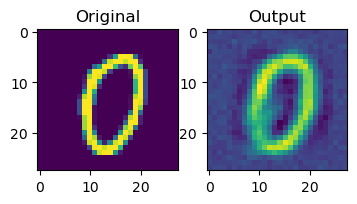

In [9]:
digit = train_set[1000][0]
pred = autoencoder(digit)
digit = digit.detach().numpy()
pred = pred.detach().numpy()

figure = plt.figure(figsize=(4,4))
figure.add_subplot(1, 2, 1)
plt.imshow(digit.reshape(28,28))
plt.title('Original')

figure.add_subplot(1, 2, 2)
plt.imshow(pred.reshape(28,28))
plt.title('Output')

plt.show()

In [8]:
torch.save(autoencoder.state_dict(), 'model_parameters.pth')

## EVEN LESS BOTTLENECK

In [13]:
autoencoder2 = AutoEncoder([784, 400, 50], [50, 400, 784])

In [14]:
autoencoder2.train(train_set, batch_size = 5, epochs = 50, lr = 0.01)

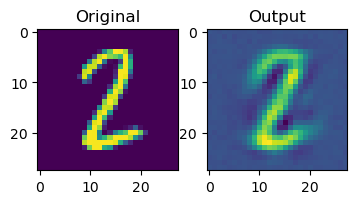

In [94]:
digit = train_set[38800][0]
pred = autoencoder2(digit)
digit = digit.detach().numpy()
pred = pred.detach().numpy()

figure = plt.figure(figsize=(4,4))
figure.add_subplot(1, 2, 1)
plt.imshow(digit.reshape(28,28))
plt.title('Original')

figure.add_subplot(1, 2, 2)
plt.imshow(pred.reshape(28,28))
plt.title('Output')

plt.show()

In [18]:
torch.save(autoencoder2.state_dict(), 'model_parameters_50.pth')

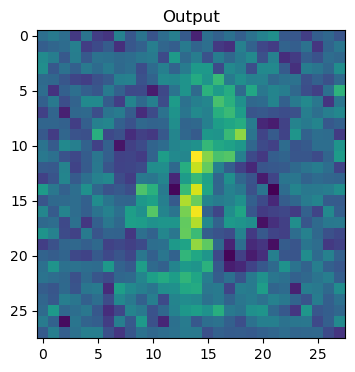

In [35]:
def index2onehot(index, size):
    return [(0 if i != index else 1) for i in range(size)]

decoder = autoencoder2.decoder


input = torch.tensor(index2onehot(3,50)).float()
output = decoder(input).detach().numpy()

plt.figure(figsize=(4,4))
plt.imshow(output.reshape(28,28))
plt.title('Output')
plt.show()

## OMG 10 BOTTLENECK?

In [40]:
autoencoder3 = AutoEncoder([784, 400, 100, 10], [10,100 ,400, 784])

In [42]:
autoencoder3.train(train_set, batch_size = 5, epochs = 60, lr = 0.01)

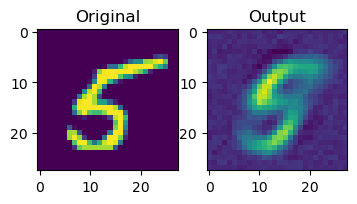

In [90]:
digit = test_set[6500][0]
pred3 = autoencoder3(digit)
digit = digit.detach().numpy()
pred3 = pred3.detach().numpy()

figure = plt.figure(figsize=(4,4))
figure.add_subplot(1, 2, 1)
plt.imshow(digit.reshape(28,28))
plt.title('Original')

figure.add_subplot(1, 2, 2)
plt.imshow(pred3.reshape(28,28))
plt.title('Output')

plt.show()

In [ ]:
torch.save(autoencoder2.state_dict(), 'model_parameters_50.pth')

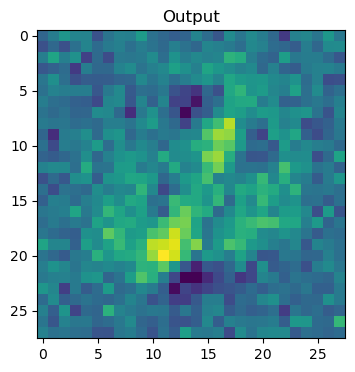

In [88]:
def index2onehot(index, size):
    return [(0 if i != index else 1) for i in range(size)]

decoder = autoencoder3.decoder


input = torch.tensor([3,0,10,0,0,10,0,1,0,0]).float()
output = decoder(input).detach().numpy()

plt.figure(figsize=(4,4))
plt.imshow(output.reshape(28,28))
plt.title('Output')
plt.show()

In [50]:
torch.save(autoencoder3.state_dict(), 'model_parameters_784_400_100_10.pth')